# Importazione Librerie

In [ ]:
# tf_keras_vis è una libreria specializzata per interpretare i modelli di DL
! pip install tf_keras_vis

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Caricamento Modello



In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# senza creare ed addestrare un nuovo modello di CNN, sfruttiamo il modello VGG16 di Keras per il riconoscimento di entità nelle immagini.
model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# Caricamento e Pre-processing immagini di esempio

In [4]:
# collegamento con il drive per caricare le immagini di esempio
from google.colab import drive
drive.mount("/content/drive")

import os

path = os.getcwd()
path_dataset = 'drive/MyDrive/Colab Notebooks/images'

Mounted at /content/drive


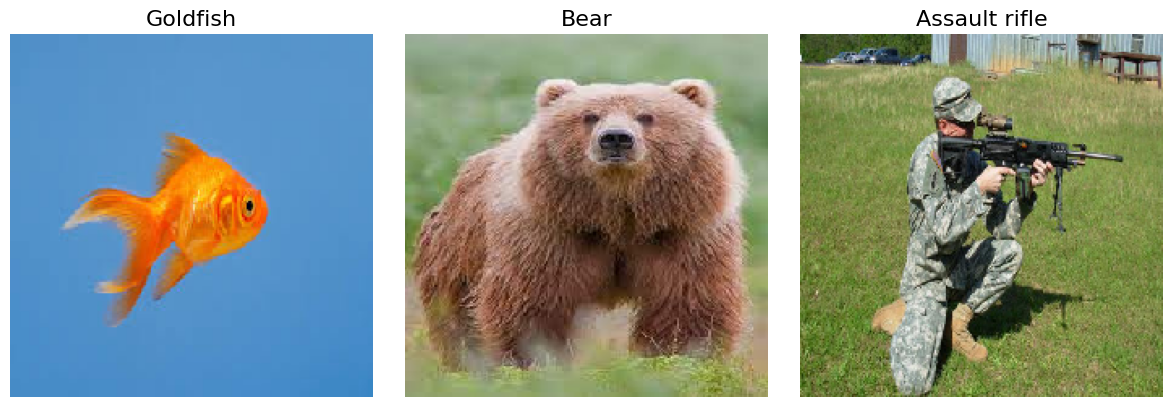

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# titoli corrispondenti alle immagini che caricheremo
image_titles = ['Goldfish', 'Bear', 'Assault rifle']

# carichiamo le immagini in modo che siano compatabili con il modello VGG16 (224x224)
img1 = load_img(os.path.join(path, path_dataset, 'goldfish.jpeg'), target_size=(224, 224))
img2 = load_img(os.path.join(path, path_dataset, 'bear.jpeg'), target_size=(224, 224))
img3 = load_img(os.path.join(path, path_dataset, 'soldiers.jpg'), target_size=(224, 224))

# convertiamo le immagini in array numerici numpy e salviamole in una lista
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# prepara l'input, normalizzando le immagini, in modo che sia adatto per il modello caricato
X = preprocess_input(images)

# visualizziamo le immagini di esempio
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Modifica al modello necessaria per l'interpretabilità
Quando la funzione di attivazione softmax viene applicata all'ultimo layer del modello, potrebbe ostacolare la generazione delle immagini dell'attenzione, quindi dovremmo rimpiazzarla con una funzione di atttivazione lineare. Qui usiamo la funzione ReplaceToLinear, ma potremmo creare una nostra.



In [6]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# sfruttiamo ReplaceToLinear della libreria
replace2linear = ReplaceToLinear()

# oppure definiamo una nostra funzione, che prende in input una copia del modello originale
# e cambia la funzione di attivazione dell'ultimo layer con una lineare
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

# Funzione di score

Creiamo un istanza di Score, o definiamo una nostra funzione, per restituire i punteggi target.

In [7]:
from tf_keras_vis.utils.scores import CategoricalScore

# sfruttiamo CategoricalScore della libreria, una classe che serve a definire quali categorie (classi) ci interessano per calcolare le visualizzazioni
# creiamo un oggetto score in modo da specificare di voler massimizzare la probabilità delle classi specificate (passate come indici)
score = CategoricalScore([1, 294, 413]) # indici delle immagini corrispondenti in imagenet (1-Goldfish, 293-bear, 413-assault rifle)

# oppure definiamo una nostra funzione, che prende in input l'output grezzo del modello, in tal caso nel formato (3, 1000) ovvero (esempi, classi),
# ed estae dalle immagini i valori delle classi corrispondenti
def score_function(output):
    return (output[0][1], output[1][294], output[2][413])

# Vanilla Saliency

Vanilla Saliency è una delle tecniche di interpretabilità delle reti neurali, che ha l'obiettivo di trovare quali pixel dell’immagine influenzano di più la decisione del modello.

Nella pratica, viene calcolato il gradiente dell'output rispetto all'immagine di input, grazie al quale possiamo capire tramite piccole modifiche come cambia il risultato della rete. L'idea è che pixel con valori di gradiente grandi sono molto importanti.

Infine viene generata una saliency map in cui vengono visualizzate le regioni dell'immagine di input che contribuiscono maggiormente al valore di output.

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(3, 224, 224, 3))']
  warnings.warn(msg)


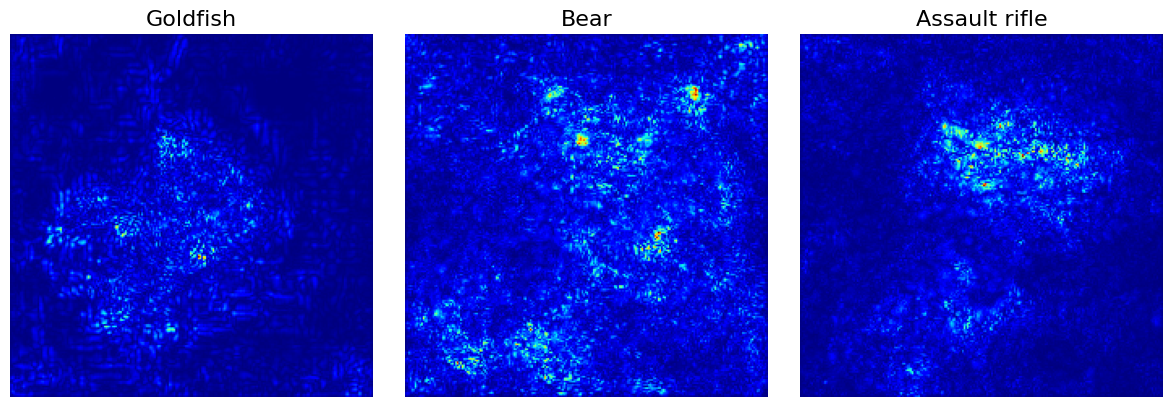

CPU times: user 14.2 s, sys: 2.06 s, total: 16.3 s
Wall time: 12 s


In [8]:
# per misurare quanto tempo impiega
%%time

from tensorflow.keras import backend as K # contiene funzioni a basso livello
from tf_keras_vis.saliency import Saliency

# definiamo un oggetto Saliency, specificando il modello di DL (VGG16), il model modifer, e se creare una copia del modello prima di moficarlo
saliency = Saliency(model, model_modifier=replace2linear, clone=True)

# generiamo la saliency map, passando in input score, che specifica quale classe analizzare per ogni immagine, e X, le immagini di input
# la funzione calcolerà per ogni immagine il gradiente dell'output di quella classe rispetto ai pixel dell'immagine.
# e salverà il risultato come saliency map
saliency_map = saliency(score, X)

# dalla versione 0.6.0 in poi, non è più necessario effettuare normalize()
# from tf_keras_vis.utils import normalize
# saliency_map = normalize(saliency_map)

# visualizziamo le saliency map generate
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# SmoothGrad
Come possiamo notare, le Vanilla Saliency map sono molto rumorose. SmoothGrad è una tecnica migliorata della Vanilla Saliency, che risolve il problema aggiungendo del rumore casuale alle immagini di partenza, calcolando il gradiente più volte, su immagini leggermente modificate, e infine mediando tutti i gradienti ottenuti.


Osservazione: poicheè SmoothGrad calcola i gradienti ripetutamente, potrebbe richedere circa 2-3 minuti nel caso si usi la sola CPU.

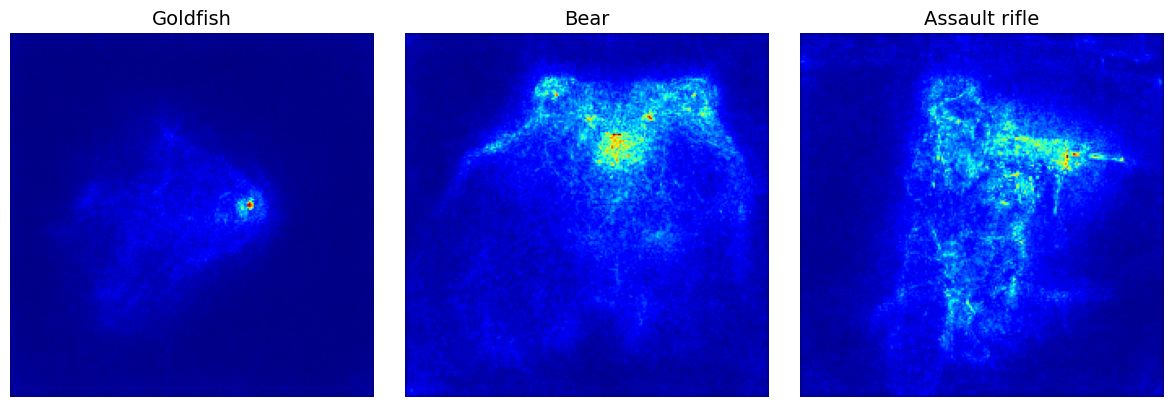

CPU times: user 3min 51s, sys: 7.68 s, total: 3min 58s
Wall time: 2min 33s


In [9]:
%%time

# generiamo le saliency map come prima, ma aggiungendo come parametri smooth_samples e smooth_noise
saliency_map = saliency(score, X,
                        smooth_samples=20, # numero di iterazioni del calcolo dei gradienti
                        smooth_noise=0.20) # livello del rumore aggiunti


# visualizziamo le saliency map generate
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# GradCAM
GradCAM è un'altra tecnica per visualizzare l'attenzione sull'input, che non guarda solo i gradienti rispetto all’input (come Vanilla Saliency), ma anche i gradienti rispetto all’ultima mappa di feature della rete, ovvero il penultimo layer, cioè lo strato convoluzionale appena prima degli strati Dense. Infine combina queste informazioni per capire su quale parte dell’immagine il modello si è concentrato di più per prendere la decisione.

Grad-CAM quindi ci aiuta a capire dove ha guardato il modello per classificare un'immagine, sovrapponendo una heatmap sull'immagine stessa.



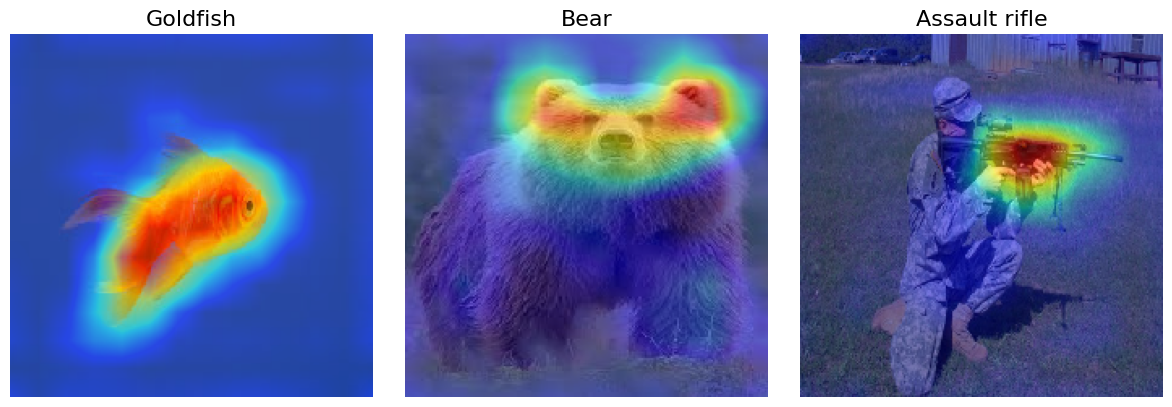

CPU times: user 14.6 s, sys: 1.93 s, total: 16.5 s
Wall time: 10.9 s


In [10]:
%%time

from matplotlib import cm   # colormap
from tf_keras_vis.gradcam import Gradcam

# definiamo un oggetto Gradcam, specificando il modello di DL (VGG16), il model modifer, e se creare una copia del modello prima di moficarlo
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)

# generiamo le heatmap con GradCAM
cam = gradcam(score, X, penultimate_layer=-1)


# visualizziamo le heatmap
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

GradCAM è un metodo utile per capire intuitivamente dove si trova l'attenzione, tuttavia, osservando attentamente, possiamo notare che le attenzioni visualizzate non coprono completamente il target (in particolare la testa dell'orso) nell'immagine.



# GradCAM++
Grad-CAM++ è una versione avanzata di Grad-CAM ed è stato sviluppato per superare alcune limitazioni del Grad-CAM classico.

Grad-CAM++, anzichè usare la media dei gradienti per calcolare l'importanza dei pixel,  utilizza una ponderazione più raffinata dei gradienti (soprattutto per le caratteristiche piccole), dando più attenzione a determinate aree piccole e precise, come le parti dettagliate di un oggetto (ad esempio, la testa dell'orso).


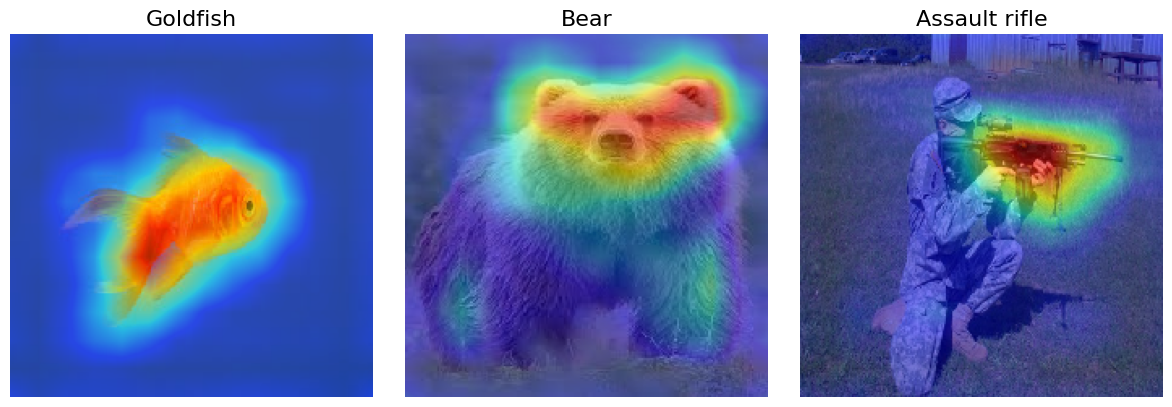

CPU times: user 13.2 s, sys: 1.9 s, total: 15.1 s
Wall time: 10.6 s


In [11]:
%%time

from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# cambia solo la classe dell'oggetto, mentre il codice rimane pressochè invariato

# definiamo un oggetto Gradcam++, specificando il modello di DL (VGG16), il model modifer, e se creare una copia del modello prima di moficarlo
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

# generiamo le heatmap con GradCAM++
cam = gradcam(score, X, penultimate_layer=-1)

# visualizziamo le heatmap
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

Come possiamo notare, ora, le attenzioni visualizzate coprono quasi completamente gli oggetti bersaglio!


# ScoreCAM
ScoreCAM è un'altra tecnica di interpretabilità con una differenza fondamentale rispetto alle precedenti, in quanto non usa i gradienti per calcolare l'attivazione della mappa, ma si basa sulle attivazioni di un layer convoluzionale e sulle predizioni di score.

Nella pratica, per ogni zona dell'immagine, ScoreCAM perturba l'immagine, modificando i valori della regione, e calcola come il modello risponde a tale perturbazione, misurando l'impulso nel punteggio di classe.

Il vantaggio principale è che non dipende dai gradienti, quindi non ha i limiti di metodi come Grad-CAM che si basano sulla retropropagazione del gradiente.


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 224, 224, 3))',)
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 834s 17s/step


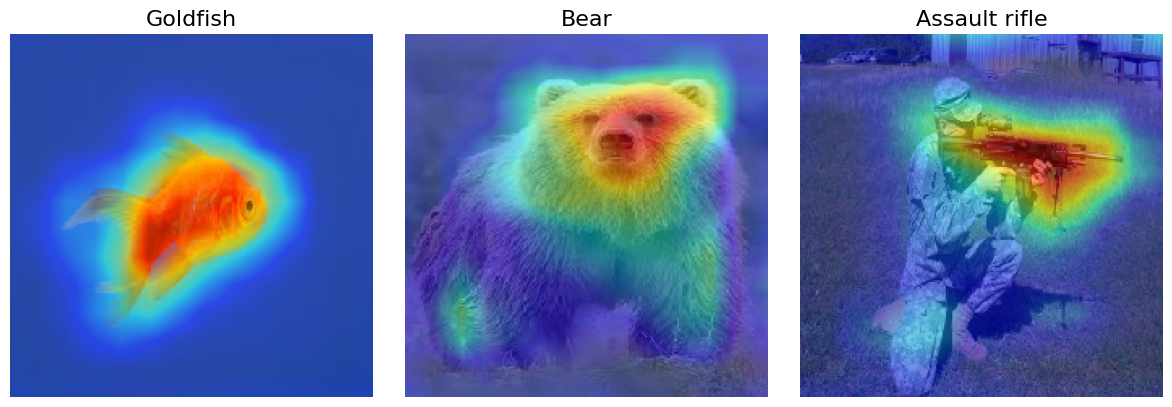

CPU times: user 22min 40s, sys: 1min 5s, total: 23min 45s
Wall time: 14min 45s


In [12]:
%%time

from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus

# definiamo un oggetto ScoreCAM, specificando solamente il modello di DL (VGG16)
scorecam = Scorecam(model)

# generiamo le heatmap con ScoreCAM
cam = scorecam(score, X, penultimate_layer=-1)

# visualizziamo le heatmap
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

Come possiamo notare, il risultato è leggermente più sofisticato.


Osservazione : ScoreCAM è una buona tecnica, tuttavia necessità di più tempo rispetto alle altre tecniche.



# Faster-ScoreCAM
In Score-CAM, ogni canale (o feature map) del modello viene usato per calcolare l'importanza delle regioni dell'immagine, perturbando ciascuna regione e osservando l'effetto sul punteggio finale. Tuttavia, alcuni canali potrebbero non essere molto informativi o potrebbero avere una bassa variabilità, quindi non contribuiscono significativamente all'interpretazione del modello.

Faster-Score-CAM migliora questo processo introducendo un concetto importante, eliminare i canali con bassa variabilità. L'idea è che i canali con una bassa varianza (cioè quelli che non mostrano variazioni significative tra le diverse immagini) potrebbero non essere rilevanti per la previsione e quindi non dovrebbero essere considerati quando si generano le mappe di attivazione.

Faster-Score-CAM quindi migliora l'efficienza di Score-CAM focalizzandosi solo su canali significativi (con alta varianza), ottimizzando il processo di generazione della heatmap.

2/3 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 224, 224, 3))',)
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 17s/step


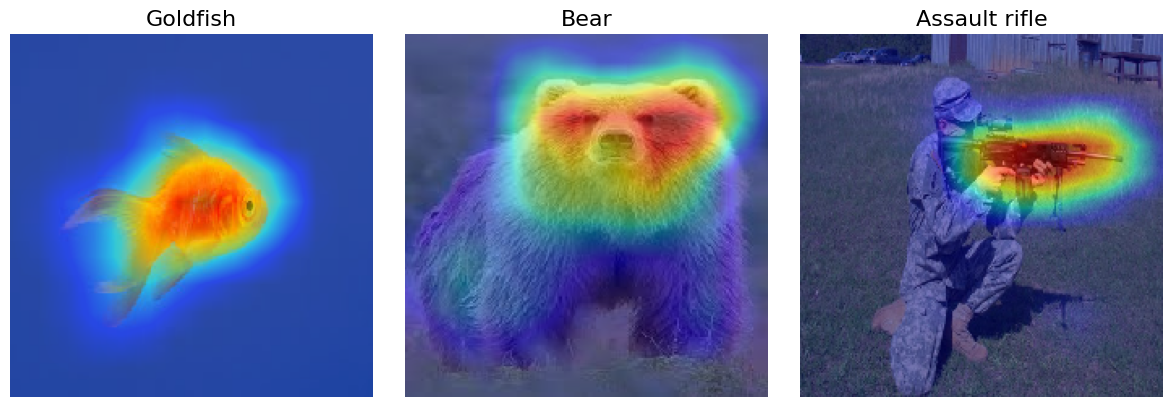

CPU times: user 1min 27s, sys: 8.8 s, total: 1min 36s
Wall time: 1min 27s


In [13]:
%%time

from tf_keras_vis.scorecam import Scorecam

# definiamo un oggetto ScoreCAM, specificando il modello di DL (VGG16) ed il model modifer
scorecam = Scorecam(model, model_modifier=replace2linear)

# generiamo le heatmap con Faster-ScoreCAM, specificando in aggiunta max_N
# ovvero il numero di punti (10) più rilevanti da considerare anzichè esaminare tutte le possibili regioni nell'immagine.
# Questo è l'elemento che velocizza il processo, selezionando un sottoinsieme di regioni da perturbare, riducendo significativamente il tempo di calcolo.
# con max_N = -1 si ottiene propio la versione originale ScoreCam
cam = scorecam(score, X, penultimate_layer=-1, max_N=10)

# visualizziamo le heatmap
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()